In [744]:
import numpy as np
from numpy.lib.scimath import sqrt as csqrt

In [725]:
lam = float(input('Nanometers '))*10**(-9)
k_0 = 2*np.pi/lam


Nanometers 500


In [766]:
d_lst = [0,lam/8,0]
eps_lst = [1,4,16]

In [767]:
def get_matrix_S(k_0,k_x,eps):
    k_z = csqrt((k_0**2)*eps - k_x**2)
    
    return np.array([[1,1],[-k_z/k_0,k_z/k_0]])


def get_matrix_P(k_0,k_x,eps):
    k_z = csqrt((k_0**2)*eps - k_x**2)
    
    return np.array([[k_z/(k_0*eps),k_z/(k_0*eps)],[1,-1]])

def get_matrix_T(k_0,k_x,d,eps):
    k_z = csqrt(((k_0**2)*eps - k_x**2))
    
    return np.array([[np.exp(1j*k_z*d),0],[0,np.exp(-1j*k_z*d)]])

In [768]:
def get_Transfer_matrix(pol,k_0,k_x,d_lst,eps_lst):
        for i in range(len(eps_lst)-1,-1,-1):
            if pol == 1:
                mat_F = get_matrix_S(k_0,k_x,eps_lst[i])
            elif pol == 2:
                mat_F = get_matrix_P(k_0,k_x,eps_lst[i])

            mat_T = get_matrix_T(k_0,k_x,d_lst[i],eps_lst[i])

            if i == len(d_lst)-1:
                res = np.dot(mat_T,np.linalg.inv(mat_F))
            elif i == 0:
                res = np.dot(res.dot(mat_F),mat_T)
            else:
                res = np.dot(np.dot(res.dot(mat_F),mat_T),np.linalg.inv(mat_F))
        return res

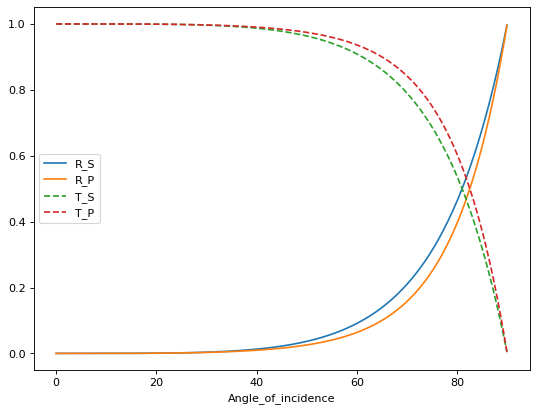

In [769]:
angle = np.linspace(0,3.14/2,300)
k_x = [k_0*np.sin(i)*csqrt(eps_lst[0]) for i in angle]

R_S_lst = []
R_P_lst = []
T_S_lst = []
T_P_lst = []

pvo = 1.57
if eps_lst[0]>eps_lst[1]:
    pvo = np.arcsin(np.sqrt(eps_lst[1]/eps_lst[0]))
    k_x_max = k_0*np.sin(pvo)*np.sqrt(eps_lst[0])

    
for i in k_x:
    if i>k_x_max:
        r_s = r_p = 1
    else:
        T_S = get_Transfer_matrix(1,k_0,i,d_lst,eps_lst)
        T_P = get_Transfer_matrix(2,k_0,i,d_lst,eps_lst)
    
    
        r_s = -abs(T_S[1][0]/T_S[1][1])
        r_p = -abs(T_P[1][0]/T_P[1][1])
    
    R_S_lst.append(r_s**2)
    R_P_lst.append(r_p**2)
    
    T_S_lst.append(1-r_s**2)
    T_P_lst.append(1-r_p**2)

angle_graph = [i*57.29 for i in angle] 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(angle_graph,R_S_lst,label = 'R_S')
plt.plot(angle_graph,R_P_lst,label = 'R_P')
plt.plot(angle_graph,T_S_lst,linestyle ='--',label = 'T_S')
plt.plot(angle_graph,T_P_lst,linestyle ='--',label = 'T_P')
plt.xlabel('Angle_of_incidence')
plt.ticklabel_format(axis='x',style='sci',scilimits=(0,90))
plt.legend()